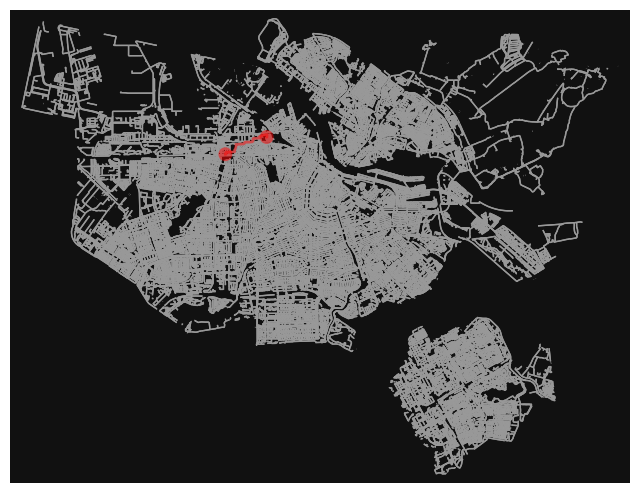

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [1]:
# Check anomalies in the graph
import osmnx as ox
import networkx as nx
import random

city = "Amsterdam, Netherlands"
walk_graph = ox.graph_from_place(city, network_type="walk", retain_all=True, simplify=True)

# Select a random start-end pair
common_nodes = list(walk_graph.nodes)
start, end = random.sample(common_nodes, 2)

# Compute and plot the shortest walking route
route = nx.shortest_path(walk_graph, source=start, target=end, weight="length")
ox.plot_graph_route(walk_graph, route, route_linewidth=2, node_size=0)


In [ ]:

from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import numpy as np

# Ensuring Polygon is OK

test_polygon = Polygon([
    (-0.15959462510063094, 51.45871326661125),
    (-0.20527095224165798, 51.45498066376268),
    (-0.2794013848148002, 51.46384509715716),
    (-0.3018651522612069, 51.500684019001),
    (-0.29812119102013923, 51.53330123880726),
    (-0.2075173289363157, 51.59148819076247),
    (-0.12814535062567853, 51.61753179862907),
    (-0.03304873510255663, 51.61520708382517),
    (0.042579282563684165, 51.59427929131137),
    (0.06979633286079964, 51.55419159738553),
    (0.07363463506775911, 51.50053158112758),
    (0.047455151612534954, 51.45754671515023),
    (-0.11358833658457389, 51.43974802328263),
    (-0.16039408026716045, 51.45655808105909),
    (-0.15959462510063094, 51.45871326661125),
])

# Check if polygon is valid
print(f"Polygon is valid: {test_polygon.is_valid}")

# Check if polygon is simple (no self-intersections)
print(f"Polygon is simple: {test_polygon.is_simple}")

# Check if polygon is closed (first and last points match)
first_point = test_polygon.exterior.coords[0]
last_point = test_polygon.exterior.coords[-1]
is_closed = first_point == last_point
print(f"Polygon is closed: {is_closed}")

# Calculate and print area and perimeter
print(f"Polygon area: {test_polygon.area:.6f} square degrees")
print(f"Polygon perimeter: {test_polygon.length:.6f} degrees")

# Check if polygon is clockwise
coords = list(test_polygon.exterior.coords)
is_clockwise = sum((x2 - x1) * (y2 + y1) for (x1, y1), (x2, y2) in zip(coords, coords[1:])) > 0
print(f"Polygon is clockwise: {is_clockwise}")


Polygon is valid: False
Polygon is simple: False
Polygon is closed: True
Polygon area: 0.051715 square degrees
Polygon perimeter: 1.424848 degrees
Polygon is clockwise: True


: 

In [ ]:
# ensuring and counting one way streets

import osmnx as ox
import networkx as nx

# Define the city
city = "Manhattan, New York, USA"

# Download the drive network
G_drive = ox.graph_from_place(city, network_type="walk", retain_all=True, simplify=True)

# Check if the graph is directed
print(f"Graph is directed: {nx.is_directed(G_drive)}")

# Count one-way streets
oneway_edges = [(u, v) for u, v, d in G_drive.edges(data=True) if d.get("oneway") in ["yes", True, "1"]]

# Output the result
print(f"Number of one-way edges: {len(oneway_edges)}")
